<a href="https://colab.research.google.com/github/mlindsey19/Deep-Learning-dexa/blob/master/deepLearn_dexa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preprocessing

* Data was selected mulitple spreadsheets matching de-Identification number.
* Easy clinical mesuments along side dual energy X-ray absorptiometry (DXA).
* The puposed is to preditct the more expesive DXA test with simple clinical mesurements.
* Data was transposed to single speadshee and uploaded to CSV file on github.

[data reference table](https://calerie.duke.edu/sites/calerie.duke.edu/files/calerie2_analysis_dataset_details_0.pdf)

In [0]:
import pandas as pd
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings('ignore')

url = 'https://raw.githubusercontent.com/mlindsey19/dxa/master/dxadl.csv?token=AIP6LNNC6IQE3JXDC6PVBWC42OT4Y'

rdat = pd.read_csv(url)
rdat.head()


Separate and extract data: 

Hight, Weight and BMI calculation

In [0]:
dat1 = pd.DataFrame()
dat1 = rdat.iloc[0: , [0,2,3,4]]
dat1.head()

,deidnum visit,mclinwt,height,mbmi
0,60 SCR V1,77.6,173.90,25.66034891
1,231 SCR V1,78.9,177.80,24.95821318
2,596 SCR V1,70.2,177.20,22.35680182
3,823 SCR V1,65.3,153.10,27.8588253
4,867 SCR V1,71.8,179.15,22.37127927


* Mean of the 2 closest natural waist measurements
* Mean of the 2 closest umbilical waist measurements

In [0]:
dat2 = pd.DataFrame()
dat2 = rdat.iloc[0: , 6 : 9]
dat2.head()

,deidnum visit.1,meanwst,meanumb
0,903 Baseline,72.25,80.5
1,903 BL Sub 1,72.25,80.5
2,1057 Baseline,72.25,82.5
3,1057 BL Sub 1,72.25,86
4,1057 BL Sub 2,72.25,79


* gender/age/race/ethinicy

In [0]:
dat3 = pd.DataFrame()
dat3 = rdat.iloc[0: , [11, 13, 14, 18, 19]]
dat3.head()

DXA (Dual-energy X-ray absorptiometry) is used to measure body composition: % body fat, fat mass (FM), fat free
mass (FFM), bone mineral density (BMD), bone mineral content (BMC).


In [0]:
dat4 = pd.DataFrame()
dat4 = rdat.iloc[0: , [21, 23, 24, 25]]
dat4.head()

,deidnum visit.2,TRUNKFAT,fm,ffm
0,903 Baseline,7.367624579,18.52068867,40.77931133
1,903 BL Sub 1,7.367624579,18.52068867,40.77931133
2,1057 Baseline,7.916222507,18.44967646,33.20032355
3,1057 BL Sub 1,8.032587724,18.58043726,33.21956274
4,1057 BL Sub 2,7.799857291,18.31891565,33.18108435


In [0]:
cdat = pd.DataFrame()
# merge data on combination of deidnum and visit (combined in speadsheet before upload to csv)
cdat = pd.merge(dat1, dat2, left_on='deidnum visit', right_on='deidnum visit.1')
cdat = pd.merge(cdat, dat4, left_on='deidnum visit', right_on='deidnum visit.2')
#slpit deiednum from vist for merge with demographics
new = cdat['deidnum visit.1'].str.split(n=1,expand=True)
cc= pd.concat([new, cdat], axis=1)
df = dat3.dropna(subset = ['deidnum'])
df.loc['deidnum'] = df['deidnum'].apply(int) #slice error disregaurd
cc[0] = cc[0].apply(int)
aa = pd.merge(cc, df, left_on=0, right_on='deidnum' )

aa = aa.drop(columns=['deidnum visit.2','deidnum visit.1', 'deidnum visit', 'deidnum']) 
#aa = aa.drop(columns=['ETHNIC']) 
bb = aa.drop(columns=[0, 1])

bb.head()

,mclinwt,height,mbmi,meanwst,meanumb,TRUNKFAT,fm,ffm,GENDER,ETHNIC,age,race
0,59.18333333,159.00,23.41020266,72.25,80.5,7.367624579,18.52068867,40.77931133,Female,Not Hispanic or Latino,27.0,White
1,59.18333333,159.00,23.41020266,72.25,80.5,7.367624579,18.52068867,40.77931133,Female,Not Hispanic or Latino,27.0,White
2,51.81666667,147.65,23.76854347,72.25,82.5,7.916222507,18.44967646,33.20032355,Female,Not Hispanic or Latino,42.0,Asian
3,51.86666667,147.65,23.7914787,72.25,86,8.032587724,18.58043726,33.21956274,Female,Not Hispanic or Latino,42.0,Asian
4,51.76666667,147.65,23.74560824,72.25,79,7.799857291,18.31891565,33.18108435,Female,Not Hispanic or Latino,42.0,Asian


In [0]:
#reorder and drop rows with " " in any value
bb = bb[['mclinwt',	'height',	'mbmi',	'meanwst',	'meanumb', 'GENDER',	'age',	'race', 'ETHNIC',	'TRUNKFAT',	'fm',	'ffm'	]]
bb = bb.dropna(subset = ['mclinwt',	'height',	'mbmi',	'meanwst',	'meanumb', 'GENDER',	'age',	'race', 'ETHNIC',	'TRUNKFAT',	'fm',	'ffm'])
bb =bb[bb['mclinwt'] != " "]
bb =bb[bb['ETHNIC'] != " "]
bb =bb[bb['height'] != " "]
bb =bb[bb['mbmi'] != " "]
bb =bb[bb['meanwst'] != " "]
bb =bb[bb['meanumb'] != " "]
bb =bb[bb['age'] != " "]
bb =bb[bb['race'] != " "]
bb =bb[bb['TRUNKFAT'] != " "]
bb =bb[bb['fm'] != " "]
bb =bb[bb['ffm'] != " "]


In [0]:
bb['race'] = pd.Categorical( bb['race'] )
bbr = pd.get_dummies(bb['race'], prefix = 'race')
bb = pd.concat([bb, bbr], axis=1)

bb['GENDER'] = pd.Categorical( bb['GENDER'] )
bbg = pd.get_dummies(bb['GENDER'], prefix = 'GEN')
bb = pd.concat([bb, bbg], axis=1)

bb['ETHNIC'] = pd.Categorical( bb['ETHNIC'] )
bbe = pd.get_dummies(bb['ETHNIC'], prefix = 'ETH')
bb = pd.concat([bb, bbe], axis=1)

bb = bb.drop(columns=['race','GENDER', 'ETHNIC',]) 

bb.head()

,mclinwt,height,mbmi,meanwst,meanumb,age,TRUNKFAT,fm,ffm,race_Asian,race_Black or African American,race_Other,race_White,GEN_Female,GEN_Male,ETH_Hispanic or Latino,ETH_Not Hispanic or Latino,ETH_Unknown (not reporting ethnicity
0,59.18333333,159.00,23.41020266,72.25,80.5,27.0,7.367624579,18.52068867,40.77931133,0,0,0,1,1,0,0,1,0
1,59.18333333,159.00,23.41020266,72.25,80.5,27.0,7.367624579,18.52068867,40.77931133,0,0,0,1,1,0,0,1,0
2,51.81666667,147.65,23.76854347,72.25,82.5,42.0,7.916222507,18.44967646,33.20032355,1,0,0,0,1,0,0,1,0
3,51.86666667,147.65,23.7914787,72.25,86,42.0,8.032587724,18.58043726,33.21956274,1,0,0,0,1,0,0,1,0
4,51.76666667,147.65,23.74560824,72.25,79,42.0,7.799857291,18.31891565,33.18108435,1,0,0,0,1,0,0,1,0


In [0]:
#enumerate
#bb['race'],enum_race = bb['race'].factorize()
#bb['GENDER'],enum_GENDER = bb['GENDER'].factorize()
#bb['ETHNIC'],enum_ETHNIC = bb['ETHNIC'].factorize()
#map_enums = [ [ enum_race, bb['race'] ], [ enum_GENDER, bb['GENDER']], [ enum_ETHNIC, bb['ETHNIC']  ] ]

#for en in map_enums:
#  print("\n\nNumeric Representation : ", en[1].unique()) 
#  print("Unique Values : ", en[0].unique()) 

His

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc285b9cbe0>,
      dtype=object)

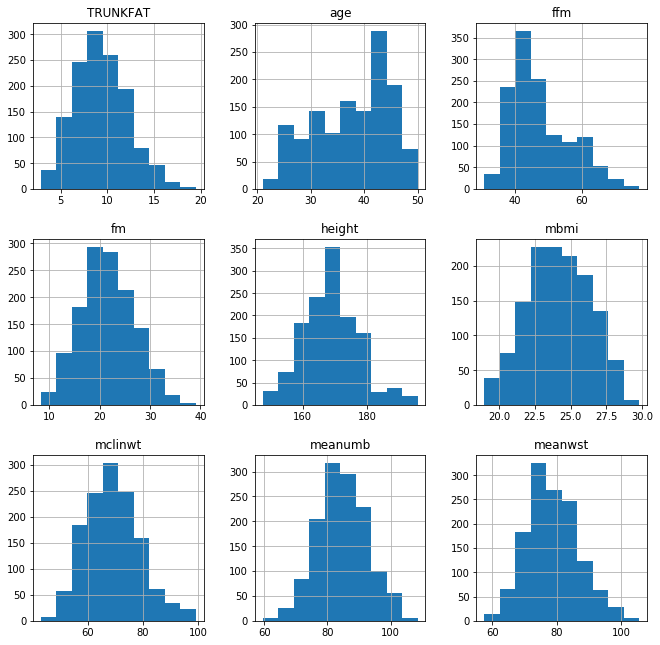

In [0]:
ab = bb.apply(pd.to_numeric)
ab.head()
ab[ab.dtypes[(ab.dtypes=="float64")|(ab.dtypes=="int64")]
                        .index.values].hist(figsize=[11,11])

In [0]:
from scipy import stats
import sklearn.preprocessing as prp
df=ab

std_scale = prp.StandardScaler().fit(df[['mclinwt',	'height',	'mbmi',	'meanwst',	'meanumb', 	'age',		'TRUNKFAT',	'fm',	'ffm'	]])
df_std = std_scale.transform(df[['mclinwt',	'height',	'mbmi',	'meanwst',	'meanumb', 	'age',		'TRUNKFAT',	'fm',	'ffm'	]])
minmax_scale = prp.MinMaxScaler().fit(df[['mclinwt',	'height',	'mbmi',	'meanwst',	'meanumb', 	'age',		'TRUNKFAT',	'fm',	'ffm'	]])
df_minmax = minmax_scale.transform(df[['mclinwt',	'height',	'mbmi',	'meanwst',	'meanumb', 	'age',	'TRUNKFAT',	'fm',	'ffm'	]])


 Plot to visualize at exact/standardized/normalized relationships between 
 
 **plot(A,B,x,y)** take 4 arguments, the Key names and the index in the above lists

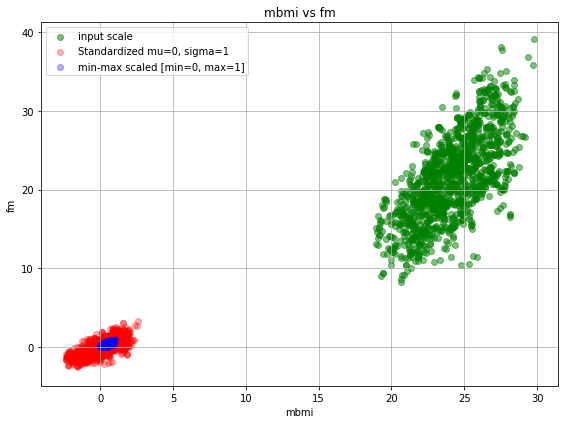

In [0]:
from matplotlib import pyplot as plt

def plot(A,B,x,y): #A,B -> keys; x,y -> index of A,B
    plt.figure(figsize=(8,6))

    plt.scatter(df[A], df[B],
            color='green', label='input scale', alpha=0.5)

    plt.scatter(df_std[:,x], df_std[:,y], color='red',
            label='Standardized mu=0, sigma=1', alpha=0.3)

    plt.scatter(df_minmax[:,x], df_minmax[:,y],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title(f'{A} vs {B}')
    plt.xlabel(A)
    plt.ylabel(B)
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot('mbmi','fm', 2, 7)
plt.show()


In [0]:
dz = bb.copy()
#standardize
#dz['TRUNKFAT'],dz['fm'],dz['ffm'] = df_std[:,6],df_std[:,7],df_std[:,8]
dz['mclinwt'],dz['height'],dz['mbmi'] ,dz['meanwst'],dz['meanumb'] ,dz['age']= df_std[:,0],df_std[:,1],df_std[:,2],df_std[:,3],df_std[:,4],df_std[:,5]
#normalize
#dz['mclinwt'],dz['height'],dz['mbmi'] ,dz['meanwst'],dz['meanumb'] ,dz['age']= df_minmax[:,0],df_minmax[:,1],df_minmax[:,2],df_minmax[:,3],df_minmax[:,4],df_minmax[:,5]
dz['TRUNKFAT'],dz['fm'],dz['ffm'] = df_minmax[:,6],df_minmax[:,7],df_minmax[:,8]

dz = dz[['mclinwt',	'height',	'mbmi',	'meanwst',	'meanumb', 'age',	'race_Asian','race_Black or African American','race_Other','race_White','GEN_Female','GEN_Male', 'ETH_Hispanic or Latino','ETH_Not Hispanic or Latino','ETH_Unknown (not reporting ethnicity','TRUNKFAT',	'fm',	'ffm'	]]
dz.head()

,mclinwt,height,mbmi,meanwst,meanumb,age,race_Asian,race_Black or African American,race_Other,race_White,GEN_Female,GEN_Male,ETH_Hispanic or Latino,ETH_Not Hispanic or Latino,ETH_Unknown (not reporting ethnicity,TRUNKFAT,fm,ffm
0,-1.004507,-1.148936,-0.335524,-0.79921,-0.510340,-1.490195,0,0,0,1,1,0,0,1,0,0.269392,0.331101,0.214854
1,-1.004507,-1.148936,-0.335524,-0.79921,-0.510340,-1.490195,0,0,0,1,1,0,0,1,0,0.269392,0.331101,0.214854
2,-1.755932,-2.477331,-0.171149,-0.79921,-0.257665,0.580070,1,0,0,0,1,0,0,1,0,0.302549,0.328796,0.051988
3,-1.750831,-2.477331,-0.160629,-0.79921,0.184516,0.580070,1,0,0,0,1,0,0,1,0,0.309582,0.333041,0.052402
4,-1.761032,-2.477331,-0.181670,-0.79921,-0.699846,0.580070,1,0,0,0,1,0,0,1,0,0.295516,0.324552,0.051575


#Build NN

In [0]:
from keras.models import Sequential
from keras import regularizers
from keras import layers
from sklearn.metrics import r2_score
from keras.layers import Input, Dense, BatchNormalization
import numpy as np
dataset = dz.to_numpy()
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x)})
np.random.seed(19)
print(dataset.shape)

(1326, 18)


In [0]:
np.random.shuffle(dataset)
print(dataset)

[[-1.71 -0.48 -2.25 ... 0.11 0.24 0.12]
 [-0.36 -1.01 0.64 ... 0.46 0.50 0.24]
 [0.06 1.33 -1.23 ... 0.36 0.38 0.41]
 ...
 [-0.68 -1.20 0.31 ... 0.40 0.49 0.18]
 [-0.29 -0.31 -0.08 ... 0.55 0.56 0.22]
 [-0.49 -0.42 -0.28 ... 0.24 0.33 0.31]]


In [0]:
x_train = dataset[:800,0:15]
y_train = dataset[:800,15:]
x_val = dataset[800:1063,0:15]
y_val = dataset[800:1063,15:]
x_test = dataset[1063:,0:15]
y_test = dataset[1063:,15:]
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)
print(x_test.shape)
print(y_test.shape)

(800, 15)
(800, 3)
(263, 15)
(263, 3)
(263, 15)
(263, 3)


In [0]:
def r_square(y_true, y_pred):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_true - y_pred)) 
    SS_tot = K.sum(K.square(y_true - K.mean(y_true))) 
    return ( 1 - SS_res/(SS_tot + K.epsilon() ) )

In [0]:
model = Sequential()
model.add(Dense(15, input_dim=15, activation='linear'))
model.add(BatchNormalization())
model.add(Dense(16,kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model.add(Dense(128,kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model.add(Dense(256,kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model.add(Dense(256,kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model.add(Dense(128,kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model.add(Dense(3, activation='linear'))
print(model.summary())
model.compile(loss='mse', optimizer='rmsprop', metrics=[r_square])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 15)                240       
_________________________________________________________________
batch_normalization_2 (Batch (None, 15)                60        
_________________________________________________________________
dense_10 (Dense)             (None, 16)                256       
_________________________________________________________________
dense_11 (Dense)             (None, 128)               2176      
_________________________________________________________________
dense_12 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_13 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_14 (Dense)             (None, 128)               32896     
__________

In [0]:
history = model.fit(x_train, y_train, epochs=64, batch_size=64, validation_data=(x_val,y_val))

Train on 800 samples, validate on 263 samples
Epoch 1/64
800/800 [==============================] - 0s 105us/step - loss: 0.0135 - r_square: 0.8155 - val_loss: 0.0190 - val_r_square: 0.6377
Epoch 2/64
800/800 [==============================] - 0s 99us/step - loss: 0.0129 - r_square: 0.8310 - val_loss: 0.0132 - val_r_square: 0.8129
Epoch 3/64
800/800 [==============================] - 0s 98us/step - loss: 0.0117 - r_square: 0.8587 - val_loss: 0.0142 - val_r_square: 0.7727
Epoch 4/64
800/800 [==============================] - 0s 98us/step - loss: 0.0128 - r_square: 0.8194 - val_loss: 0.0110 - val_r_square: 0.8690
Epoch 5/64
800/800 [==============================] - 0s 96us/step - loss: 0.0115 - r_square: 0.8505 - val_loss: 0.0141 - val_r_square: 0.7628
Epoch 6/64
800/800 [==============================] - 0s 95us/step - loss: 0.0116 - r_square: 0.8418 - val_loss: 0.0138 - val_r_square: 0.7670
Epoch 7/64
800/800 [==============================] - 0s 96us/step - loss: 0.0113 - r_square: 0

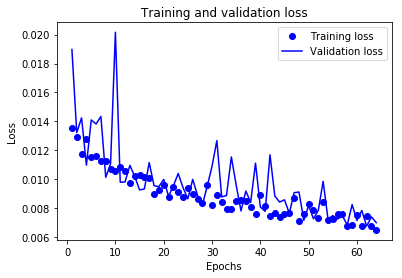

In [0]:
epochs = range(1, len(history.history['loss']) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
scores = model.evaluate(x_train, y_train)
print(model.metrics_names)
print(scores)
print("\n%s (mse): %.3f" % (model.metrics_names[0], scores[0]))
print('R²: %.2f' % ( scores[1]))

800/800 [==============================] - 0s 59us/step
['loss', 'r_square']
[0.006086143366992473, 0.892519314289093]

loss (mse): 0.006
R²: 0.89


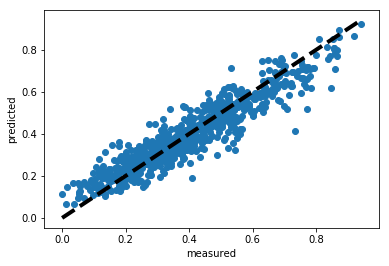

In [0]:
y_pred =model.predict(x_test)
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

In [0]:
scores = model.evaluate(x_test, y_test)
print(scores)
print("\n%s (mse): %.3f" % (model.metrics_names[0], scores[0]))
print('R²: %.2f' % ( scores[1]))

263/263 [==============================] - 0s 88us/step
[0.007075350458942665, 0.8670092503834134]

loss (mse): 0.007
R²: 0.87


#Linear Regression 

Comparison of linear regression on the same data set

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

reg = LinearRegression()

reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
y_predicted = reg.predict(x_test)
print("Mean squared error: %.3f" % mean_squared_error(y_test, y_predicted))
print('R²: %.2f' % r2_score(y_test, y_predicted))


Mean squared error: 0.005
R²: 0.84


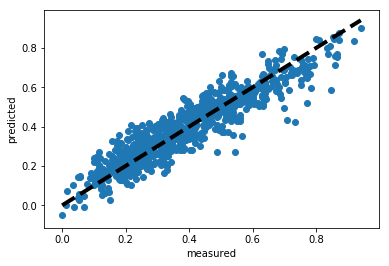

In [0]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_predicted)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('measured')
ax.set_ylabel('predicted')
plt.show()

#DropOut



In [0]:
modelDrop = Sequential()
modelDrop.add(Dense(8, input_dim=15, activation='relu'))
modelDrop.add(Dense(128, activation='relu'))
modelDrop.add(Dense(128, activation='relu'))
modelDrop.add(Dense(128, activation='relu'))
modelDrop.add(layers.Dropout(rate = 0.2))
modelDrop.add(Dense(64, activation='relu'))
modelDrop.add(Dense(16, activation='relu'))
modelDrop.add(Dense(32, activation='relu'))
modelDrop.add(Dense(16, activation='relu'))
modelDrop.add(Dense(3, activation='linear'))
print(modelDrop.summary())

In [0]:
modelDrop.compile(loss='mse', optimizer='rmsprop', metrics=['mse',r_square])
historyDrop = modelDrop.fit(x_train, y_train, epochs=64, batch_size=32, validation_data=(x_val,y_val))

Train on 800 samples, validate on 263 samples
Epoch 1/64
800/800 [==============================] - 1s 709us/step - loss: 0.0050 - mean_squared_error: 0.0050 - r_square: 0.8360 - val_loss: 0.0052 - val_mean_squared_error: 0.0052 - val_r_square: 0.8312
Epoch 2/64
800/800 [==============================] - 0s 148us/step - loss: 0.0043 - mean_squared_error: 0.0043 - r_square: 0.8620 - val_loss: 0.0051 - val_mean_squared_error: 0.0051 - val_r_square: 0.8346
Epoch 3/64
800/800 [==============================] - 0s 151us/step - loss: 0.0043 - mean_squared_error: 0.0043 - r_square: 0.8626 - val_loss: 0.0049 - val_mean_squared_error: 0.0049 - val_r_square: 0.8409
Epoch 4/64
800/800 [==============================] - 0s 148us/step - loss: 0.0044 - mean_squared_error: 0.0044 - r_square: 0.8570 - val_loss: 0.0050 - val_mean_squared_error: 0.0050 - val_r_square: 0.8374
Epoch 5/64
800/800 [==============================] - 0s 145us/step - loss: 0.0042 - mean_squared_error: 0.0042 - r_square: 0.8674

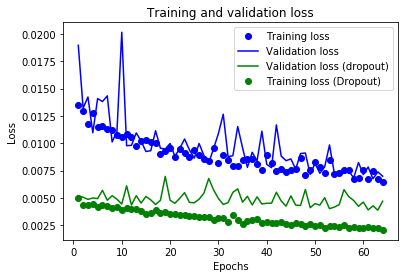

In [0]:
epochs = range(1, len(history.history['loss']) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
# b is for "solid blue line"
plt.plot(epochs, historyDrop.history['val_loss'], 'g', label='Validation loss (dropout)')
plt.plot(epochs, historyDrop.history['loss'], 'go', label='Training loss (Dropout)')
# b is for "solid blue line"
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
scores = modelDrop.evaluate(x_test, y_test)
print(scores)
print("\n%s: %.3f" % (model.metrics_names[1], scores[1]))
print('R²: %.2f' % ( scores[2]))

263/263 [==============================] - 0s 81us/step
[0.0040926951667145176, 0.0040926951667145176, 0.8759409941647895]

r_square: 0.004
R²: 0.88


#Plot Model

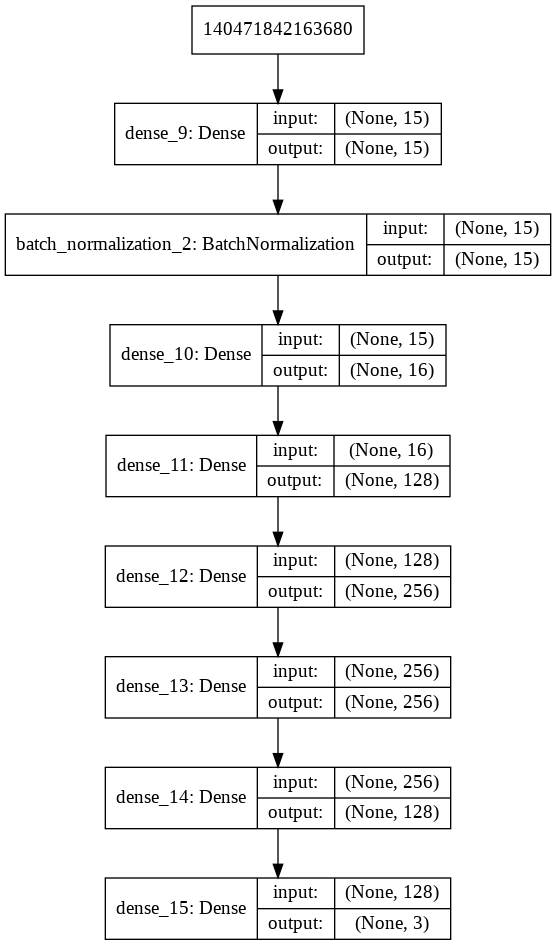

In [0]:
from keras.utils import plot_model
from IPython.display import Image, display


plot_model(model, show_shapes=True, show_layer_names=True, to_file = 'model.png')
from google.colab import files

display(Image('model.png'))



#RNN

In [0]:
import keras as keras


input1 = Input(shape=(15,))
y = BatchNormalization()(input1)
x = Dense(16, activation='relu')(y)
x = Dense(16, activation='relu')(x)
x = Dense(15, activation='relu')(x)
add1 = keras.layers.add([x, y])
x1 = Dense(16, activation='relu')(add1)
x1 = Dense(16, activation='relu')(x1)
x1 = Dense(15, activation='relu')(x1)
add2 = keras.layers.add([x1, x])
x1=add2
for _ in range(8):
  x2 = Dense(256, activation='relu')(add2)
  x2 = Dense(128, activation='relu')(x2)
  x2 = Dense(128, activation='relu')(x2)
  x2 = Dense(15, activation='relu')(x2)
  add2 = keras.layers.add([x2, x1])
  x1 = add2

  
x3 = Dense(128, activation='relu')(add2)
x3 = Dense(16, activation='relu')(x3)


out = Dense(3, activation='linear')(x3)
modelRes = keras.models.Model(inputs=input1, outputs=out)

modelRes.compile(loss='mse', optimizer='rmsprop', metrics=[r_square])

print(modelRes.summary())

In [0]:
historyRes = modelRes.fit(x_train, y_train, epochs=64, batch_size=32, validation_data=(x_val,y_val))

Train on 800 samples, validate on 263 samples
Epoch 1/64
800/800 [==============================] - 0s 508us/step - loss: 0.0028 - r_square: 0.9107 - val_loss: 0.0034 - val_r_square: 0.8860
Epoch 2/64
800/800 [==============================] - 0s 500us/step - loss: 0.0030 - r_square: 0.9003 - val_loss: 0.0035 - val_r_square: 0.8851
Epoch 3/64
800/800 [==============================] - 0s 507us/step - loss: 0.0033 - r_square: 0.8963 - val_loss: 0.0037 - val_r_square: 0.8784
Epoch 4/64
800/800 [==============================] - 0s 511us/step - loss: 0.0030 - r_square: 0.9054 - val_loss: 0.0033 - val_r_square: 0.8897
Epoch 5/64
800/800 [==============================] - 0s 508us/step - loss: 0.0029 - r_square: 0.9077 - val_loss: 0.0032 - val_r_square: 0.8932
Epoch 6/64
800/800 [==============================] - 0s 521us/step - loss: 0.0032 - r_square: 0.8978 - val_loss: 0.0035 - val_r_square: 0.8825
Epoch 7/64
800/800 [==============================] - 0s 496us/step - loss: 0.0035 - r_squ

263/263 [==============================] - 0s 135us/step
[0.0031191475331754964, 0.9046376064249771]

loss: 0.003
R²: 0.90


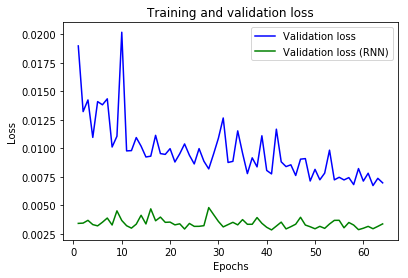

In [0]:
scores = modelRes.evaluate(x_test, y_test)
print(scores)
print("\n%s: %.3f" % (model.metrics_names[0], scores[0]))
print('R²: %.2f' % ( scores[1]))

epochs = range(1, len(history.history['loss']) + 1)
# "bo" is for "blue dot"
#plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
# b is for "solid blue line"
plt.plot(epochs, historyRes.history['val_loss'], 'g', label='Validation loss (RNN)')
#plt.plot(epochs, historyRes.history['loss'], 'go', label='Training loss (RNN)')
# b is for "solid blue line"
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

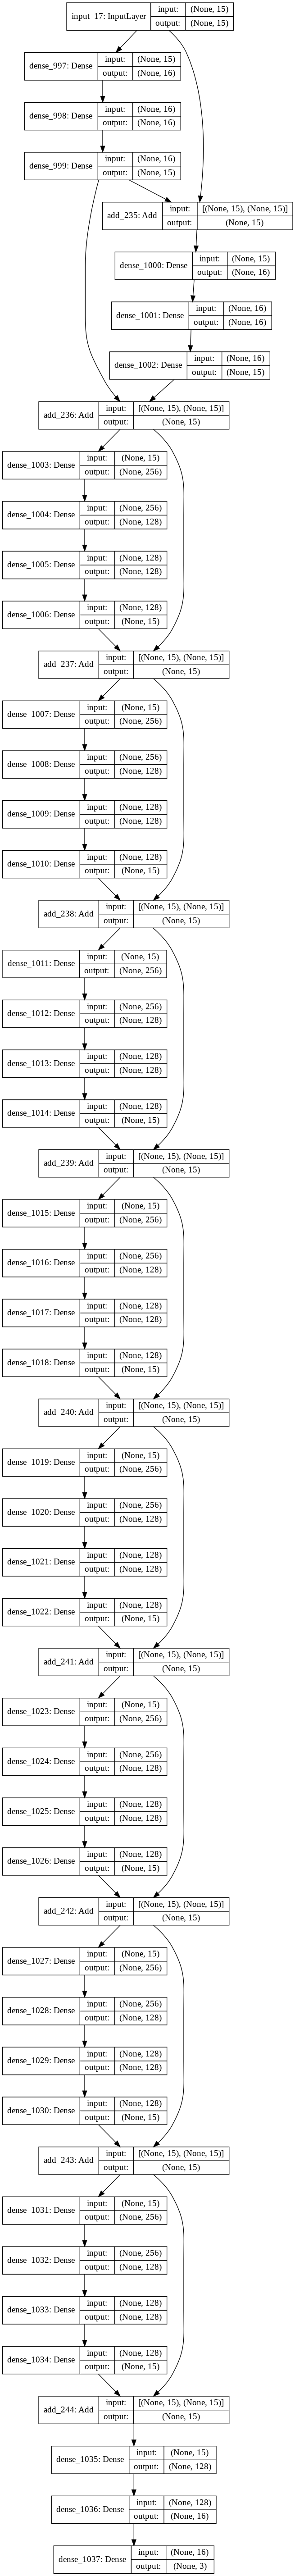

In [0]:
plot_model(modelRes, show_shapes=True, show_layer_names=True, to_file = 'model.png')
from google.colab import files

display(Image('model.png'))


Training time was much longer with smaller batch size. 
Batch normilazation increased error on small btach size as well. 
With a batch size of 8 and no batch normilazaition, similar results were observed but with much longer training times.

#Summary

Using hight, weight, waisteline and MBI and demographic information, can we predect dual energy X-ray absorptiometry (DXA) values.
The goal was to predict a more expesive procedure with simple clinical measurements.

The Final achetechure of RNN is 10 residual loops - this seemed maximize R² and minimize MSE.
The firrst two layers work best with 15 - 16 nodes, reducing or increasing these layers increased MSE. After leanring from those, larger dense layers seem to help increase R².

There did not seem to be a best optimzer for the problem. 'adam' and 'rmsprop' both gave similar results.

A module of the following study used simliar data points to predect fat mass, free fat mass, truckfat and weight.  Linear regession was used. The results are not directly comparable and their results were used in a diebeties predition model so this is not a good bench mark.
[Anthropometric Variables Accurately Predict Dual Energy X-Ray Absorptiometric-Derived Body Composition and Can Be Used to Screen for Diabetes](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0024017#s4)

However, a simple linear regression was used with the same data set. Without optimizing the regresion model, the RNN has a higher R² score and a lower mean squared error. Even the first NN out performed simple linear regression. 






